# Import the data

In [63]:
import pandas as pd
df = pd.read_excel("Naukri.xlsx")
df

,web-scraper-order,web-scraper-start-url,title,title-href,company,work-experience,salary-INR,locations,job-description,employment-type,role-category,education,preferred-key-skills,key-skills
0,1745938777-1,https://www.naukri.com/jobs-in-india-3999?expe...,Product Manager,https://www.naukri.com/job-listings-product-ma...,Somet Consulting,1 - 6 years,5-15 Lacs P.A.,"[{""locations"":""Ahmedabad""}]",-Build user centric products\n-Asses business ...,"Full Time, Permanent",Product Management - Technology,"[{""education"":""UG: Graduation Not Required""}]","[{""preferred-key-skills"":""Product Executive""}]","[{""key-skills"":""Product Executive""},{""key-skil..."
1,1745938779-2,https://www.naukri.com/jobs-in-india-3999?expe...,Human Resource Generalist (Female Candidate Im...,https://www.naukri.com/job-listings-human-reso...,Sai Educare,2 - 6 years,3-5 Lacs P.A.,"[{""locations"":""Noida""}]",End-to-end recruitment and onboarding. Maintai...,"Full Time, Permanent",HR Operations,"[{""education"":""PG: MBA/PGDM in HR/Industrial R...",[],"[{""key-skills"":""Recruitment Life Cycle""},{""key..."
2,1745938781-3,https://www.naukri.com/jobs-in-india-3999?expe...,Key Accounts Manager- Noida,https://www.naukri.com/job-listings-key-accoun...,Logis Tech India,5 - 10 years,7-8 Lacs P.A.,"[{""locations"":""Noida""}]",•\tResponsible for operations of warehouse loc...,"Full Time, Permanent",SCM & Logistics,"[{""education"":""UG: Any Graduate""}]","[{""preferred-key-skills"":""Contract Logistics""}...","[{""key-skills"":""Contract Logistics""},{""key-ski..."
3,1745938784-4,https://www.naukri.com/jobs-in-india-3999?expe...,Sr Executive- Talent Acquisition,https://www.naukri.com/job-listings-sr-executi...,Connectors,5 - 10 years,5-7 Lacs P.A.,"[{""locations"":""Gurugram""}]",Looking for candidate having experience in sal...,"Full Time, Permanent",Recruitment & Talent Acquisition,"[{""education"":""PG: MBA/PGDM in HR/Industrial R...","[{""preferred-key-skills"":""Sales Hiring""}]","[{""key-skills"":""Sales Hiring""},{""key-skills"":""..."
4,1745938785-5,https://www.naukri.com/jobs-in-india-3999?expe...,Voice Process Executive II upto 6.5lpa,https://www.naukri.com/job-listings-voice-proc...,Talent Organizers,1 - 6 years,3.5-5 Lacs P.A.,"[{""locations"":""Gurugram""},{""locations"":""Delhi ...","dear candidates,\nwe are hiring for luxury car...","Full Time, Permanent",Voice / Blended,"[{""education"":""UG: Graduation Not Required""}]","[{""preferred-key-skills"":""voice""},{""preferred-...","[{""key-skills"":""voice""},{""key-skills"":""Communi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1746110039-495,https://www.naukri.com/jobs-in-india-0?experie...,Java Full Stack Developer || Infogain || Noida,https://www.naukri.com/job-listings-java-full-...,Infogain,5 - 8 years,Not Disclosed,"[{""locations"":""Pune""},{""locations"":""Delhi / NC...",Experience : 5 to 8 yearsJob Location: Noida (...,"Full Time, Permanent",Software Development,"[{""education"":""UG: B.Tech/B.E. in Any Speciali...","[{""preferred-key-skills"":""java""},{""preferred-k...","[{""key-skills"":""java""},{""key-skills"":""Spring B..."
10240,1746110041-496,https://www.naukri.com/jobs-in-india-0?experie...,Deputy Store Manager,https://www.naukri.com/job-listings-deputy-sto...,Reliance Retail,4 - 6 years,5-8 Lacs P.A.,"[{""locations"":""Mumbai""},{""locations"":""Pune""},{...","Established in the year 2007, Reliance Brands ...","Full Time, Permanent",Retail Store Operations,"[{""education"":""UG: Any Graduate""}]",[],"[{""key-skills"":""software""},{""key-skills"":""anal..."
10241,1746110044-497,https://www.naukri.com/jobs-in-india-0?experie...,GCP Java Developer - Immediate Joiner,https://www.naukri.com/job-listings-gcp-java-d...,Capgemini,5 - 10 years,Not Disclosed,"[{""locations"":""Pune""},{""locations"":""Bengaluru""...",Job Title: GCP Java Developer - Immediate Join...,"Full Time, Permanent",IT Security,"[{""education"":""UG: Any Graduate, B.Tech/B.E. i...","[{"

# Clean the data

In [64]:
# Drop some irrelevant columns
df.drop(columns=["web-scraper-order", "web-scraper-start-url"], axis=1, inplace=True)

# Rename the 'title-href' column to "url"
df.rename(columns={"title-href": "url"}, inplace=True)

In [65]:
# Extract value1, value2, value3 for the columns whose value is in the following format:
# "[{"column_name": "value1"}, {"column_name": "value2"}, {"column_name": "value3"}]"
import ast

def clean_education_data(dataframe, column_name):
    """
    Cleans the education data in the specified column of the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to clean.

    Returns:
    pd.DataFrame: The dataframe with cleaned education data.
    """
    def clean_entry(entry):
        # Convert string representation of list to actual list
        entry_list = ast.literal_eval(entry)
        
        # Extract and join the education details
        try:
            cleaned_entry = ",".join([item[column_name] for item in entry_list])
        except TypeError:
            cleaned_entry = np.NA
        
        return cleaned_entry

    # Apply the cleaning function to the specified column
    dataframe[column_name] = dataframe[column_name].apply(clean_entry)
    
    return dataframe

df = clean_education_data(df, 'locations')
df = clean_education_data(df, 'education')
df = clean_education_data(df, 'preferred-key-skills')
df = clean_education_data(df, 'key-skills')

In [66]:
# Drop duplicate rows based on the 'url' column
df.drop_duplicates(subset='url', inplace=True)
df

,title,url,company,work-experience,salary-INR,locations,job-description,employment-type,role-category,education,preferred-key-skills,key-skills
0,Product Manager,https://www.naukri.com/job-listings-product-ma...,Somet Consulting,1 - 6 years,5-15 Lacs P.A.,Ahmedabad,-Build user centric products\n-Asses business ...,"Full Time, Permanent",Product Management - Technology,UG: Graduation Not Required,Product Executive,"Product Executive,Banking Process,Lending,Fint..."
1,Human Resource Generalist (Female Candidate Im...,https://www.naukri.com/job-listings-human-reso...,Sai Educare,2 - 6 years,3-5 Lacs P.A.,Noida,End-to-end recruitment and onboarding. Maintai...,"Full Time, Permanent",HR Operations,PG: MBA/PGDM in HR/Industrial Relations,,"Recruitment Life Cycle,Payroll Processing"
2,Key Accounts Manager- Noida,https://www.naukri.com/job-listings-key-accoun...,Logis Tech India,5 - 10 years,7-8 Lacs P.A.,Noida,•\tResponsible for operations of warehouse loc...,"Full Time, Permanent",SCM & Logistics,UG: Any Graduate,"Contract Logistics,SAP,Warehouse Management,Wa...","Contract Logistics,SAP,Warehouse Management,Wa..."
3,Sr Executive- Talent Acquisition,https://www.naukri.com/job-listings-sr-executi...,Connectors,5 - 10 years,5-7 Lacs P.A.,Gurugram,Looking for candidate having experience in sal...,"Full Time, Permanent",Recruitment & Talent Acquisition,PG: MBA/PGDM in HR/Industrial Relations,Sales Hiring,"Sales Hiring,Sales HR,Sales Recruitment,sales ..."
4,Voice Process Executive II upto 6.5lpa,https://www.naukri.com/job-listings-voice-proc...,Talent Organizers,1 - 6 years,3.5-5 Lacs P.A.,"Gurugram,Delhi / NCR","dear candidates,\nwe are hiring for luxury car...","Full Time, Permanent",Voice / Blended,UG: Graduation Not Required,"voice,Communication Skills,experienced","voice,Communication Skills,experienced,bpo,cus..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10239,Java Full Stack Developer || Infogain || Noida,https://www.naukri.com/job-listings-java-full-...,Infogain,5 - 8 years,Not Disclosed,"Pune,Delhi / NCR,Mumbai (All Areas)",Experience : 5 to 8 yearsJob Location: Noida (...,"Full Time, Permanent",Software Development,"UG: B.Tech/B.E. in Any Specialization,PG: M.Te...","java,Spring Boot,react","java,Spring Boot,react,React.Js,core java,Micr..."
10240,Deputy Store Manager,https://www.naukri.com/job-listings-deputy-sto...,Reliance Retail,4 - 6 years,5-8 Lacs P.A.,"Mumbai,Pune,Surat","Established in the year 2007, Reliance Brands ...","Full Time, Permanent",Retail Store Operations,UG: Any Graduate,,"software,analytical,po system,interpersonal sk..."
10241,GCP Java Developer - Immediate Joiner,https://www.naukri.com/job-listings-gcp-java-d...,Capgemini,5 - 10 years,Not Disclosed,"Pune,Bengaluru,Mumbai (All Areas)",Job Title: GCP Java Developer - Immediate Join...,"Full Time, Permanent",IT Security,"UG: Any Graduate, B.Tech/B.E. in Any Specializ...","GCP JAVA,Java Spring Boot,Microservices","GCP JAVA,Java Spring Boot,Microservices,GCP"
10242,Pharmacist,https://www.naukri.com/job-listings-pharmacist...,PharmEasy,0 - 5 years,"50,000-3 Lacs P.A.",Navi Mumbai,About the company: PharmEasy is a series A fun...,"Full Time, Permanent",Pharmaceutical & Biotechnology,UG: B.Pharma in Pharmacy,sales,"sales,Medical Sales,Prescription reading"


In [67]:
# View all the unique values in each column
for column in df.columns:
    if column == "job-description":
        continue
    print("\nUnique value for column {}:".format(column))
    print(df[column].unique())


Unique value for column title:
['Product Manager'
 'Human Resource Generalist (Female Candidate Immediate Joiner)'
 'Key Accounts Manager- Noida' ... 'Deputy Store Manager'
 'GCP Java Developer - Immediate Joiner'
 'Hexaware Hiring_RPA BA_Pan India_Immediate Joiner']

Unique value for column url:
['https://www.naukri.com/job-listings-product-manager-somet-consulting-ahmedabad-1-to-6-years-140425003894'
 'https://www.naukri.com/job-listings-human-resource-generalist-female-candidate-immediate-joiner-sai-educare-noida-2-to-6-years-140425003901'
 'https://www.naukri.com/job-listings-key-accounts-manager-noida-logis-tech-india-noida-5-to-10-years-140425003920'
 ...
 'https://www.naukri.com/job-listings-gcp-java-developer-immediate-joiner-capgemini-pune-bengaluru-mumbai-all-areas-5-to-10-years-250425010531'
 'https://www.naukri.com/job-listings-pharmacist-pharmeasy-navi-mumbai-0-to-5-years-290425016197'
 'https://www.naukri.com/job-listings-hexaware-hiring-rpa-ba-pan-india-immediate-joiner

In [68]:
# Filter the "employment-type" column
employment_type_values = ['Full Time, Permanent','Part Time, Permanent','Full Time, Permanent','Part Time, Permanent',
                   'Full Time, Temporary/Contractual','Part Time, Freelance/Homebased','Part Time, Temporary/Contractual',
                   'Full Time, Freelance/Homebased']
df = df[df['employment-type'].isna() | df['employment-type'].isin(employment_type_values)]
df

,title,url,company,work-experience,salary-INR,locations,job-description,employment-type,role-category,education,preferred-key-skills,key-skills
0,Product Manager,https://www.naukri.com/job-listings-product-ma...,Somet Consulting,1 - 6 years,5-15 Lacs P.A.,Ahmedabad,-Build user centric products\n-Asses business ...,"Full Time, Permanent",Product Management - Technology,UG: Graduation Not Required,Product Executive,"Product Executive,Banking Process,Lending,Fint..."
1,Human Resource Generalist (Female Candidate Im...,https://www.naukri.com/job-listings-human-reso...,Sai Educare,2 - 6 years,3-5 Lacs P.A.,Noida,End-to-end recruitment and onboarding. Maintai...,"Full Time, Permanent",HR Operations,PG: MBA/PGDM in HR/Industrial Relations,,"Recruitment Life Cycle,Payroll Processing"
2,Key Accounts Manager- Noida,https://www.naukri.com/job-listings-key-accoun...,Logis Tech India,5 - 10 years,7-8 Lacs P.A.,Noida,•\tResponsible for operations of warehouse loc...,"Full Time, Permanent",SCM & Logistics,UG: Any Graduate,"Contract Logistics,SAP,Warehouse Management,Wa...","Contract Logistics,SAP,Warehouse Management,Wa..."
3,Sr Executive- Talent Acquisition,https://www.naukri.com/job-listings-sr-executi...,Connectors,5 - 10 years,5-7 Lacs P.A.,Gurugram,Looking for candidate having experience in sal...,"Full Time, Permanent",Recruitment & Talent Acquisition,PG: MBA/PGDM in HR/Industrial Relations,Sales Hiring,"Sales Hiring,Sales HR,Sales Recruitment,sales ..."
4,Voice Process Executive II upto 6.5lpa,https://www.naukri.com/job-listings-voice-proc...,Talent Organizers,1 - 6 years,3.5-5 Lacs P.A.,"Gurugram,Delhi / NCR","dear candidates,\nwe are hiring for luxury car...","Full Time, Permanent",Voice / Blended,UG: Graduation Not Required,"voice,Communication Skills,experienced","voice,Communication Skills,experienced,bpo,cus..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10239,Java Full Stack Developer || Infogain || Noida,https://www.naukri.com/job-listings-java-full-...,Infogain,5 - 8 years,Not Disclosed,"Pune,Delhi / NCR,Mumbai (All Areas)",Experience : 5 to 8 yearsJob Location: Noida (...,"Full Time, Permanent",Software Development,"UG: B.Tech/B.E. in Any Specialization,PG: M.Te...","java,Spring Boot,react","java,Spring Boot,react,React.Js,core java,Micr..."
10240,Deputy Store Manager,https://www.naukri.com/job-listings-deputy-sto...,Reliance Retail,4 - 6 years,5-8 Lacs P.A.,"Mumbai,Pune,Surat","Established in the year 2007, Reliance Brands ...","Full Time, Permanent",Retail Store Operations,UG: Any Graduate,,"software,analytical,po system,interpersonal sk..."
10241,GCP Java Developer - Immediate Joiner,https://www.naukri.com/job-listings-gcp-java-d...,Capgemini,5 - 10 years,Not Disclosed,"Pune,Bengaluru,Mumbai (All Areas)",Job Title: GCP Java Developer - Immediate Join...,"Full Time, Permanent",IT Security,"UG: Any Graduate, B.Tech/B.E. in Any Specializ...","GCP JAVA,Java Spring Boot,Microservices","GCP JAVA,Java Spring Boot,Microservices,GCP"
10242,Pharmacist,https://www.naukri.com/job-listings-pharmacist...,PharmEasy,0 - 5 years,"50,000-3 Lacs P.A.",Navi Mumbai,About the company: PharmEasy is a series A fun...,"Full Time, Permanent",Pharmaceutical & Biotechnology,UG: B.Pharma in Pharmacy,sales,"sales,Medical Sales,Prescription reading"


# Visualize the dataset

## Make histograms of some columns

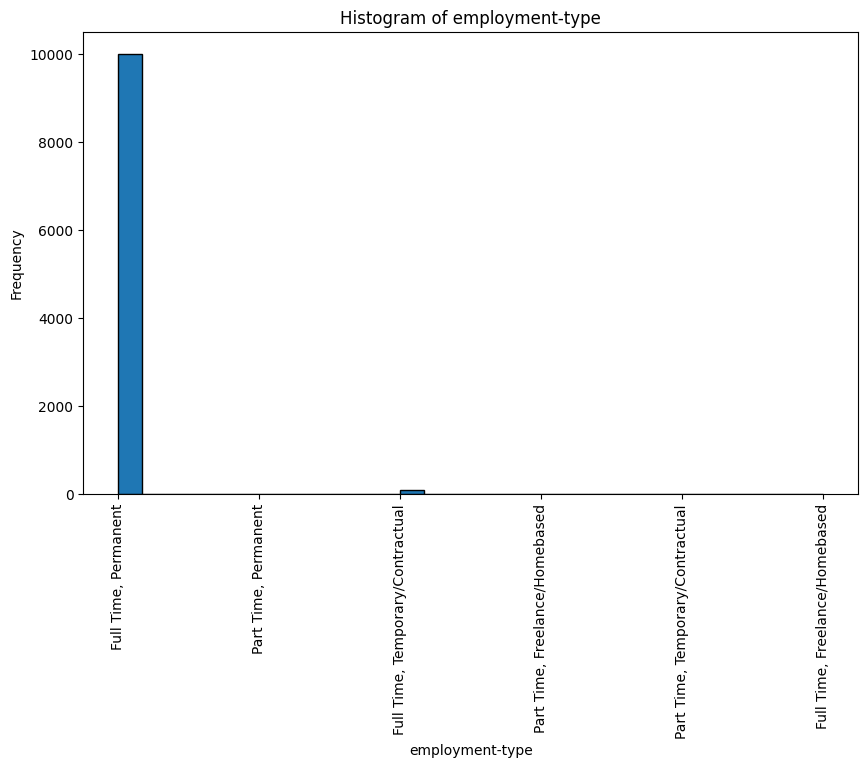

In [69]:
import matplotlib.pyplot as plt

# Created by Copilot
# A method that draw histograms from data in a specific column
def draw_histogram(dataframe, column_name):
    """
    Draws a histogram for the specified column in the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    if column_name in dataframe.columns:
        plt.figure(figsize=(10, 6))
        dataframe[column_name].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)  # Rotate x-axis labels vertically
        plt.grid(False)
        plt.show()
    else:
        print(f"Column '{column_name}' does not exist in the dataframe.")

draw_histogram(df, 'employment-type')

## View missing data

In [70]:
# An array that contain the indices of rows that have any NA value
missing_data_rows = df[df.isna().any(axis=1) | (df == '').any(axis=1)]
missing_data_rows = missing_data_rows[missing_data_rows == True].index.tolist()

print("Rows with missing data: {}".format(missing_data_rows))
print("Number of rows with missing data: {}".format(len(missing_data_rows)))

Rows with missing data: [1, 28, 46, 47, 101, 103, 116, 128, 168, 184, 193, 199, 210, 255, 290, 300, 323, 329, 359, 369, 371, 389, 398, 418, 456, 457, 479, 484, 504, 668, 671, 692, 740, 755, 768, 770, 871, 923, 930, 988, 993, 1019, 1089, 1128, 1164, 1209, 1263, 1271, 1290, 1291, 1302, 1303, 1334, 1356, 1358, 1401, 1419, 1424, 1443, 1452, 1460, 1550, 1551, 1620, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1662, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1735, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1754, 1821, 1860, 1885, 1894, 1896, 1904, 1937, 1939, 1940, 1966, 2009, 2010, 2027, 2028, 2029, 2032, 2041, 2044, 2049, 2072, 2080, 2094, 2103, 2125, 2147, 2150, 2159, 2165, 2186, 2210, 2219, 2222, 2231, 2238, 2239, 2281, 2282, 2292, 2330, 2349, 2353, 2365, 2370, 2376, 2391, 2432, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2

In [71]:
# An array that contain the columns that have any NA value
missing_data_columns = df.columns[df.isna().any() | (df == '').any()]

# Print out those columns' name
print("Columns with missing data: {}".format(missing_data_columns.values))

Columns with missing data: ['company' 'work-experience' 'salary-INR' 'locations' 'job-description'
 'employment-type' 'role-category' 'education' 'preferred-key-skills'
 'key-skills']


# Append the cleaned data to the Excel file

In [72]:
# Add the dataframe to a new sheet
with pd.ExcelWriter("Naukri.xlsx", engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name="Cleaned data", index=False)